In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("/Users/duongminh/Downloads/cause_of_deaths.csv")

# Kiểm tra dữ liệu
print(df.info())
print(df.describe())

# Kiểm tra dữ liệu bị thiếu
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

/var/folders/9g/3tkndrvn7y9_c4fw345c4hmh0000gn/T/ipykernel_8033/144083213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")


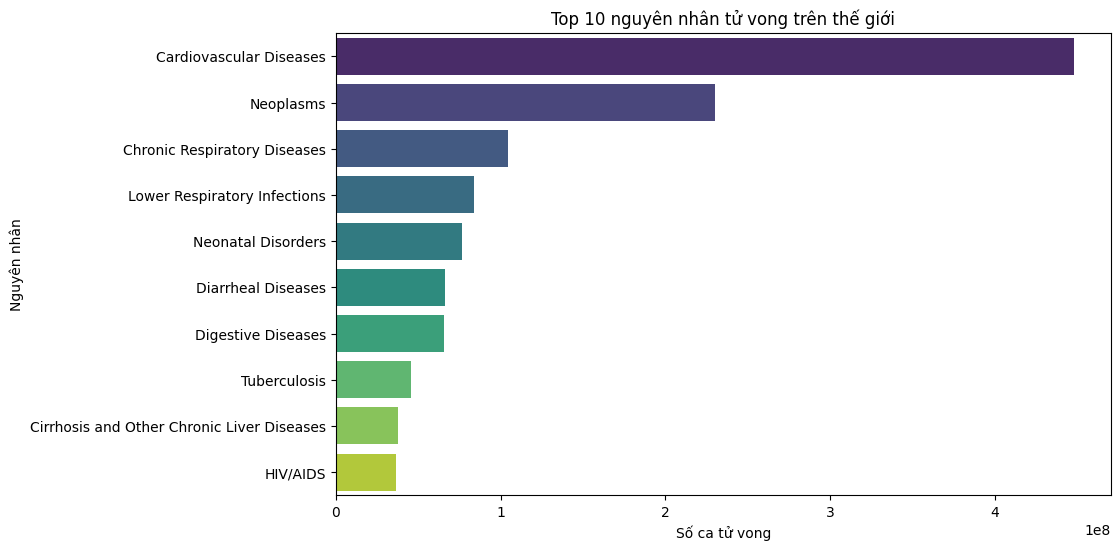

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo sử dụng đúng tên cột
df_melted = df.melt(id_vars=["Country/Territory", "Year"], var_name="Cause", value_name="Deaths")

# Chuyển đổi cột Deaths về kiểu số
df_melted["Deaths"] = pd.to_numeric(df_melted["Deaths"], errors="coerce")

# Tính tổng số ca tử vong theo nguyên nhân và lấy 10 nguyên nhân hàng đầu
top_causes = df_melted.groupby("Cause")["Deaths"].sum().nlargest(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")
plt.xlabel("Số ca tử vong")
plt.ylabel("Nguyên nhân")
plt.title("Top 10 nguyên nhân tử vong trên thế giới")
plt.show()


### Nhận xét về biểu đồ

1. **Nguyên nhân tử vong hàng đầu:**  
   - **Bệnh tim mạch (Cardiovascular Diseases)** là nguyên nhân gây tử vong cao nhất trên thế giới.
   - **Ung thư (Neoplasms)** đứng thứ hai, cho thấy tầm quan trọng của việc phát hiện và điều trị sớm.

2. **Các bệnh hô hấp và nhiễm trùng:**  
   - **Bệnh hô hấp mạn tính (Chronic Respiratory Diseases)** và **nhiễm trùng đường hô hấp dưới (Lower Respiratory Infections)** cũng nằm trong top nguyên nhân gây tử vong.

3. **Bệnh truyền nhiễm và rối loạn sơ sinh:**  
   - **HIV/AIDS** vẫn là một trong những nguyên nhân chính, mặc dù đã có nhiều tiến bộ trong điều trị.
   - **Rối loạn sơ sinh (Neonatal Disorders)** cho thấy tầm quan trọng của chăm sóc y tế cho trẻ sơ sinh.

4. **Xu hướng tổng quát:**  
   - Các bệnh không lây nhiễm như **bệnh tim, ung thư, bệnh đường hô hấp** đang là mối đe dọa lớn nhất.
   - Một số bệnh truyền nhiễm như **lao (Tuberculosis) và tiêu chảy (Diarrheal Diseases)** vẫn gây ra nhiều ca tử vong.

### Đề xuất
- **Nâng cao ý thức về sức khỏe tim mạch** qua chế độ ăn uống và tập luyện.
- **Tăng cường phát hiện và điều trị sớm ung thư** qua tầm soát định kỳ.
- **Đẩy mạnh các chương trình tiêm chủng và chăm sóc trẻ sơ sinh** để giảm tỷ lệ tử vong ở trẻ nhỏ.


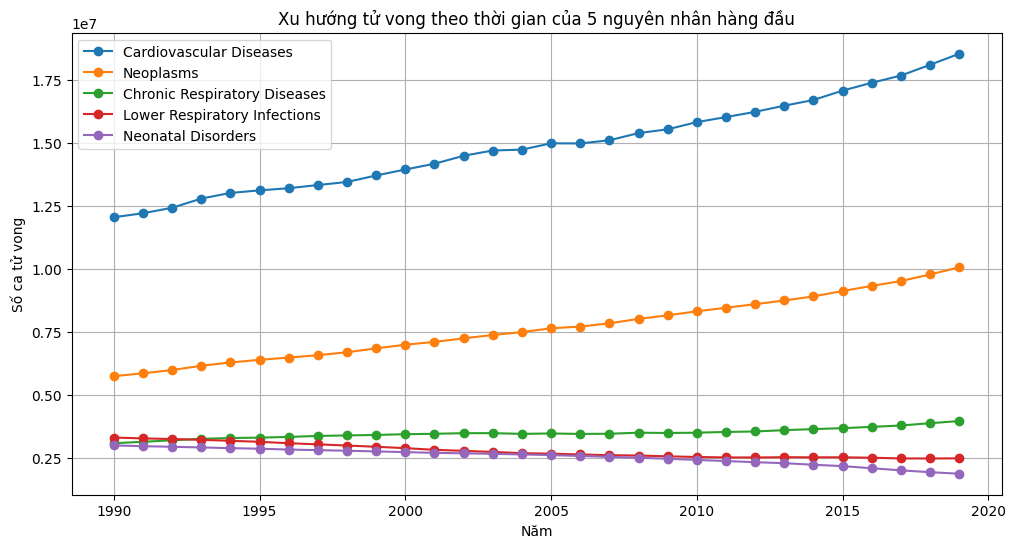

In [7]:
plt.figure(figsize=(12, 6))

top_causes = df_melted.groupby("Cause")["Deaths"].sum().nlargest(5).index  # Chọn 5 nguyên nhân hàng đầu

for cause in top_causes:
    yearly_trend = df_melted[df_melted["Cause"] == cause].groupby("Year")["Deaths"].sum()
    plt.plot(yearly_trend.index, yearly_trend.values, marker='o', label=cause)

plt.xlabel("Năm")
plt.ylabel("Số ca tử vong")
plt.title("Xu hướng tử vong theo thời gian của 5 nguyên nhân hàng đầu")
plt.legend()
plt.grid(True)
plt.show()


# Nhận xét về xu hướng tử vong theo thời gian

## 1. Tổng quan  
Biểu đồ trên thể hiện xu hướng tử vong từ năm 1990 đến 2020 của 5 nguyên nhân hàng đầu, bao gồm:  
- **Cardiovascular Diseases** (Bệnh tim mạch)  
- **Neoplasms** (Khối u)  
- **Chronic Respiratory Diseases** (Bệnh hô hấp mãn tính)  
- **Lower Respiratory Infections** (Nhiễm trùng đường hô hấp dưới)  
- **Neonatal Disorders** (Rối loạn sơ sinh)  

## 2. Nhận xét chi tiết  

### **Bệnh tim mạch (Cardiovascular Diseases)**  
- Đây là nguyên nhân gây tử vong cao nhất, với số ca tử vong liên tục tăng từ năm 1990 đến 2020.  
- Xu hướng này cho thấy bệnh tim mạch vẫn là mối đe dọa lớn đối với sức khỏe toàn cầu.  

### **Khối u (Neoplasms)**  
- Xếp thứ hai về số ca tử vong, với xu hướng gia tăng ổn định qua các năm.  
- Điều này có thể liên quan đến sự gia tăng tuổi thọ và các yếu tố nguy cơ như lối sống và ô nhiễm môi trường.  

### **Bệnh hô hấp mãn tính (Chronic Respiratory Diseases)**  
- Mặc dù số ca tử vong thấp hơn so với bệnh tim mạch và ung thư, nhưng vẫn có xu hướng tăng nhẹ theo thời gian.  

### **Nhiễm trùng đường hô hấp dưới (Lower Respiratory Infections)**  
- Có số ca tử vong thấp hơn nhưng vẫn duy trì mức ổn định.  

### **Rối loạn sơ sinh (Neonatal Disorders)**  
- Đây là nguyên nhân gây tử vong có số lượng thấp nhất trong nhóm 5 nguyên nhân hàng đầu.  
- Xu hướng giảm nhẹ, có thể do sự cải thiện trong chăm sóc y tế cho trẻ sơ sinh.  

## 3. Kết luận  
- Tử vong do bệnh tim mạch và ung thư tiếp tục gia tăng, cần có các biện pháp y tế công cộng để kiểm soát.  
- Cải thiện hệ thống y tế và thay đổi lối sống có thể giúp giảm tỷ lệ tử vong do các bệnh hô hấp mãn tính và nhiễm trùng.  


In [2]:
import pandas as pd

# Đọc dữ liệu từ file CSV (thay thế 'data.csv' bằng đường dẫn file của bạn)
df = pd.read_csv("/Users/duongminh/Downloads/cause_of_deaths.csv")

# Kiểm tra dữ liệu đã được load thành công chưa
print(df.head())


  Country/Territory Code  Year  Meningitis  \
0       Afghanistan  AFG  1990        2159   
1       Afghanistan  AFG  1991        2218   
2       Afghanistan  AFG  1992        2475   
3       Afghanistan  AFG  1993        2812   
4       Afghanistan  AFG  1994        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  ...  \
0                      2087       93      1370                    1538  ...   
1                      2153      189      1391                    2001  ...   
2                      2441      239      1514                    2299  ...   
3   

In [3]:
import plotly.express as px

# Tạo cột tổng số ca tử vong từ tất cả nguyên nhân (bỏ qua cột không liên quan)
df["Total Deaths"] = df.iloc[:, 3:].sum(axis=1)

# Nhóm tổng số ca tử vong theo quốc gia
country_deaths = df.groupby("Country/Territory")["Total Deaths"].sum().reset_index()

# Vẽ bản đồ nhiệt số ca tử vong theo quốc gia
fig = px.choropleth(country_deaths, 
                    locations="Country/Territory", 
                    locationmode="country names",
                    color="Total Deaths",
                    title="Tổng số ca tử vong theo quốc gia",
                    color_continuous_scale="Reds")

fig.show()



# Nhận xét về tổng số ca tử vong theo quốc gia  

## 1. Tổng quan  
Bản đồ nhiệt thể hiện tổng số ca tử vong theo quốc gia trên thế giới. Màu sắc càng đậm thể hiện số lượng tử vong càng cao.  

## 2. Nhận xét chi tiết  
- **Các quốc gia có số ca tử vong cao nhất**:  
  - Trung Quốc là quốc gia có số ca tử vong cao nhất, thể hiện qua màu đỏ đậm trên bản đồ.  
  - Các quốc gia có dân số lớn như Ấn Độ, Hoa Kỳ và Nga cũng có số ca tử vong cao, nhưng thấp hơn so với Trung Quốc.  

- **Các khu vực có số ca tử vong thấp hơn**:  
  - Các nước châu Phi có mức độ tử vong thấp hơn, có thể do dân số thấp hoặc dữ liệu chưa đầy đủ.  
  - Một số khu vực ở Nam Mỹ và châu Đại Dương cũng có màu sắc nhạt hơn, thể hiện số ca tử vong ít hơn so với các khu vực đông dân.  

## 3. Kết luận  
- Các quốc gia đông dân thường có tổng số ca tử vong cao hơn, điều này có thể phản ánh cả yếu tố dân số và chất lượng chăm sóc y tế.  
- Phân tích này có thể được kết hợp với các yếu tố khác như tỷ lệ tử vong trên 100.000 dân để có cái nhìn chi tiết hơn về tác động của từng nguyên nhân tử vong tại mỗi quốc gia.  


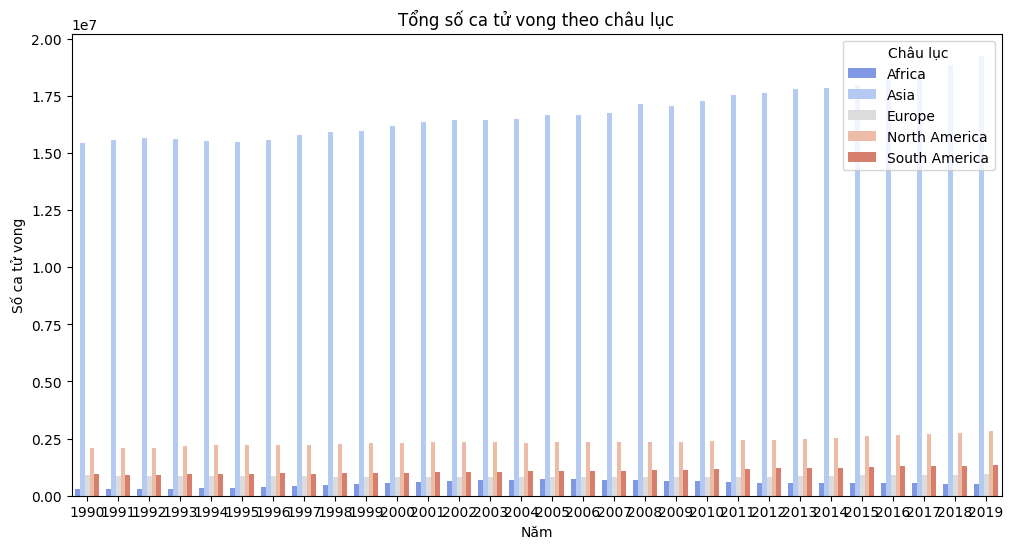

In [6]:
continent_mapping = {  # Chuyển đổi quốc gia thành châu lục
    "United States": "North America",
    "China": "Asia",
    "India": "Asia",
    "Brazil": "South America",
    "Germany": "Europe",
    "South Africa": "Africa",
    # Thêm các nước khác...
}

df["Continent"] = df["Country/Territory"].map(continent_mapping)

continent_deaths = df.groupby(["Continent", "Year"])["Total Deaths"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=continent_deaths, x="Year", y="Total Deaths", hue="Continent", palette="coolwarm")
plt.xlabel("Năm")
plt.ylabel("Số ca tử vong")
plt.title("Tổng số ca tử vong theo châu lục")
plt.legend(title="Châu lục")
plt.show()


# Nhận xét về tổng số ca tử vong theo châu lục  

## 1. Tổng quan  
Biểu đồ thanh thể hiện tổng số ca tử vong theo từng năm trên các châu lục. Màu sắc khác nhau đại diện cho từng châu lục, giúp so sánh số lượng tử vong giữa các khu vực theo thời gian.  

## 2. Nhận xét chi tiết  
- **Châu Á có số ca tử vong cao nhất**:  
  - Trong suốt các năm từ 1990 đến 2019, châu Á luôn có số ca tử vong cao nhất, thể hiện qua cột màu xanh đậm.  
  - Điều này có thể do dân số đông, mức độ ô nhiễm cao, dịch bệnh và điều kiện y tế ở một số khu vực chưa phát triển đầy đủ.  

- **Châu Âu và Bắc Mỹ có số ca tử vong thấp hơn**:  
  - Mặc dù có dân số ít hơn châu Á, nhưng châu Âu và Bắc Mỹ vẫn có số ca tử vong đáng kể.  
  - Điều này có thể do dân số già hóa ở các nước phát triển, khiến tỷ lệ tử vong tự nhiên tăng theo thời gian.  

- **Châu Phi có xu hướng tăng nhẹ**:  
  - Số ca tử vong tại châu Phi có xu hướng tăng nhẹ theo thời gian, có thể liên quan đến sự gia tăng dân số, điều kiện y tế hoặc các yếu tố dịch bệnh.  

## 3. Kết luận  
- Châu Á có tổng số ca tử vong cao nhất, tiếp theo là châu Phi, châu Âu và Bắc Mỹ.  
- Xu hướng tổng thể khá ổn định trong khoảng thời gian dài, tuy nhiên sự thay đổi về dân số và điều kiện y tế có thể ảnh hưởng đến số liệu này trong tương lai.  
- Để hiểu rõ hơn, có thể xem xét tỷ lệ tử vong trên tổng dân số từng khu vực thay vì chỉ xem tổng số ca tử vong.  


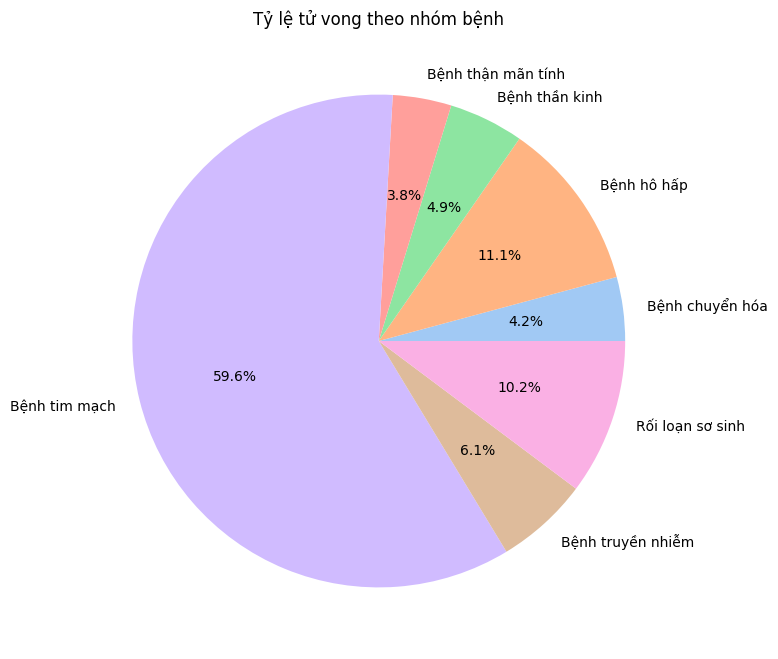

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("/Users/duongminh/Downloads/cause_of_deaths.csv")  # Thay bằng tên file thực tế

# Chuyển đổi sang long format
df_melted = df.melt(id_vars=["Country/Territory", "Code", "Year"], 
                    var_name="Cause", value_name="Deaths")

# Định nghĩa nhóm bệnh
disease_groups = {
    "Cardiovascular Diseases": "Bệnh tim mạch",
    "Lower Respiratory Infections": "Bệnh hô hấp",
    "Neonatal Disorders": "Rối loạn sơ sinh",
    "Tuberculosis": "Bệnh truyền nhiễm",
    "Liver Cancer": "Ung thư",
    "Alzheimer's Disease and Other Dementias": "Bệnh thần kinh",
    "Parkinson's Disease": "Bệnh thần kinh",
    "Diabetes Mellitus": "Bệnh chuyển hóa",
    "Chronic Kidney Disease": "Bệnh thận mãn tính",
    # Thêm các nhóm khác nếu cần
}

# Ánh xạ nhóm bệnh
df_melted["Disease Group"] = df_melted["Cause"].map(disease_groups)

# Loại bỏ các hàng không có nhóm bệnh
df_melted = df_melted.dropna(subset=["Disease Group"])

# Nhóm dữ liệu theo nhóm bệnh
grouped_deaths = df_melted.groupby("Disease Group")["Deaths"].sum()

# Vẽ biểu đồ
plt.figure(figsize=(8, 8))
plt.pie(grouped_deaths, labels=grouped_deaths.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel"))
plt.title("Tỷ lệ tử vong theo nhóm bệnh")
plt.show()


# Nhận xét về tỷ lệ tử vong theo nhóm bệnh  

## 1. Tổng quan  
Biểu đồ tròn thể hiện tỷ lệ tử vong theo từng nhóm bệnh. Mỗi phần trong biểu đồ đại diện cho một nhóm bệnh với tỷ lệ phần trăm tương ứng.  

## 2. Nhận xét chi tiết  
- **Bệnh tim mạch chiếm tỷ lệ cao nhất (59.6%)**:  
  - Đây là nguyên nhân tử vong hàng đầu trên toàn cầu, có thể liên quan đến lối sống, chế độ ăn uống, huyết áp cao và các bệnh lý khác.  
  - Xu hướng này cũng phù hợp với thực tế rằng các nước phát triển có tỷ lệ bệnh tim mạch cao do dân số già hóa.  

- **Bệnh hô hấp (11.1%) và rối loạn sơ sinh (10.2%)** là hai nguyên nhân lớn tiếp theo:  
  - Các bệnh hô hấp bao gồm viêm phổi, COPD, và các bệnh liên quan đến ô nhiễm không khí.  
  - Rối loạn sơ sinh có thể liên quan đến tình trạng y tế kém trong giai đoạn thai kỳ hoặc khi sinh.  

- **Bệnh truyền nhiễm chiếm 6.1%**:  
  - Mặc dù không phải nguyên nhân hàng đầu, nhưng bệnh truyền nhiễm vẫn là một nguy cơ lớn, đặc biệt là ở các khu vực có điều kiện vệ sinh kém.  

- **Bệnh chuyển hóa (4.2%), bệnh thần kinh (4.9%) và bệnh thận mãn tính (3.8%)**:  
  - Những nhóm bệnh này có tỷ lệ thấp hơn nhưng vẫn đáng chú ý, đặc biệt là bệnh chuyển hóa (như tiểu đường) đang có xu hướng gia tăng.  

## 3. Kết luận  
- Bệnh tim mạch là nguyên nhân gây tử vong chính, cần có các biện pháp phòng ngừa như kiểm soát huyết áp, chế độ ăn uống lành mạnh và tập luyện thể dục.  
- Các bệnh hô hấp, rối loạn sơ sinh và bệnh truyền nhiễm vẫn là những nguyên nhân đáng quan tâm, đặc biệt trong các nhóm dân số dễ bị tổn thương.  
- Nghiên cứu sâu hơn có thể tập trung vào sự phân bố tử vong theo khu vực địa lý hoặc độ tuổi để có góc nhìn toàn diện hơn.  


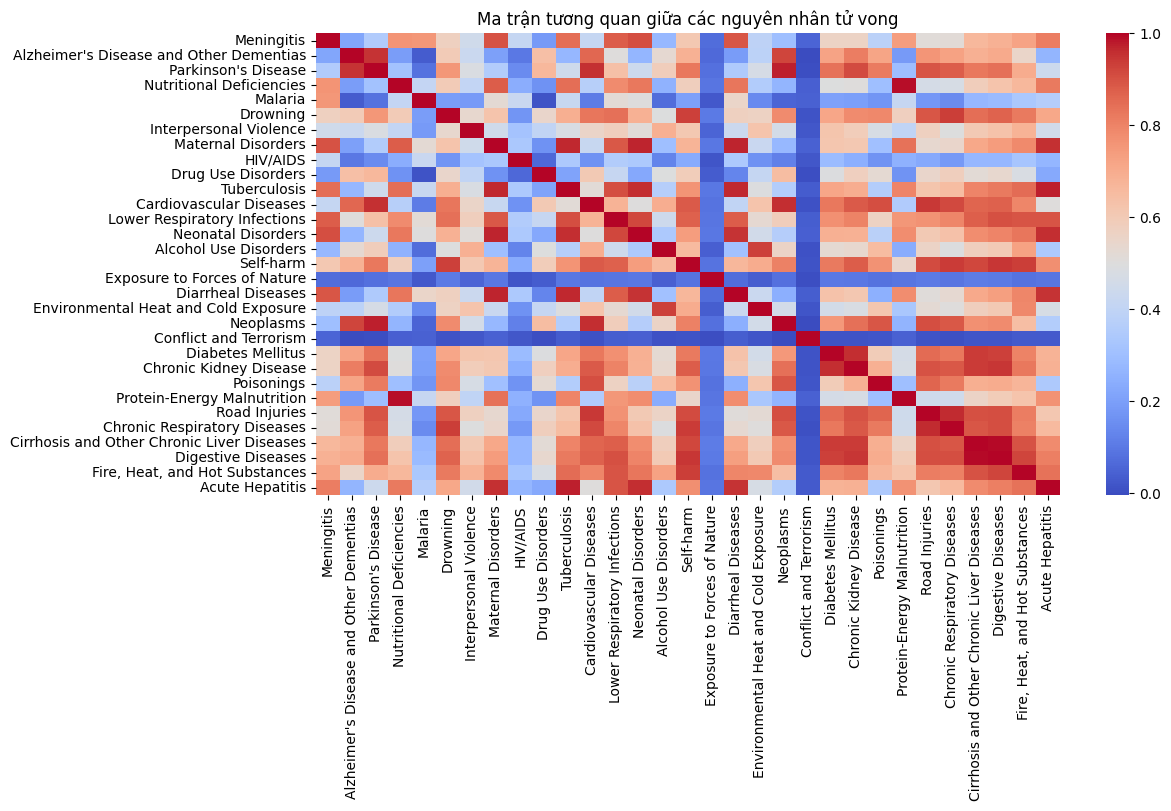

In [12]:
correlation_matrix = df.iloc[:, 3:].corr()  # Tính tương quan giữa các cột số

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Ma trận tương quan giữa các nguyên nhân tử vong")
plt.show()


# Nhận xét về ma trận tương quan giữa các nguyên nhân tử vong  

## 1. Tổng quan  
Ma trận tương quan hiển thị mối quan hệ giữa các nguyên nhân tử vong. Màu sắc biểu thị mức độ tương quan:  
- **Màu đỏ đậm**: Tương quan mạnh dương (các nguyên nhân này có xu hướng cùng tăng/giảm).  
- **Màu xanh đậm**: Tương quan mạnh âm (một nguyên nhân tăng thì nguyên nhân còn lại giảm).  
- **Màu trung tính**: Ít hoặc không có tương quan.  

## 2. Nhận xét chi tiết  
- **Bệnh tim mạch có tương quan mạnh với bệnh tiểu đường và bệnh thận mãn tính**:  
  - Điều này hợp lý vì bệnh tiểu đường có thể làm tăng nguy cơ mắc bệnh tim mạch.  
  - Bệnh thận mãn tính thường là hậu quả của cả hai nhóm bệnh trên.  

- **Bệnh Alzheimer có tương quan với bệnh Parkinson**:  
  - Cả hai đều là bệnh lý thần kinh, thường xuất hiện ở người cao tuổi.  

- **Bệnh hô hấp mãn tính và nhiễm trùng đường hô hấp có tương quan cao**:  
  - Điều này cho thấy nhiễm trùng hô hấp có thể là một yếu tố nguy cơ hoặc biến chứng của bệnh hô hấp mãn tính.  

- **Tự tử có mối tương quan với rối loạn sử dụng chất kích thích và rối loạn tâm thần**:  
  - Điều này phù hợp với nghiên cứu thực tế rằng rối loạn tâm thần và nghiện chất có thể làm tăng nguy cơ tự tử.  

- **Các bệnh liên quan đến môi trường (nhiệt độ cao, tiếp xúc độc tố) có mối tương quan với bệnh truyền nhiễm**:  
  - Các yếu tố môi trường có thể ảnh hưởng đến sự lây lan của các bệnh truyền nhiễm.  

## 3. Kết luận  
- Một số nhóm bệnh có mối liên hệ chặt chẽ, có thể dùng để dự đoán nguy cơ mắc bệnh hoặc tử vong.  
- Cần nghiên cứu sâu hơn về nguyên nhân và tác động giữa các nhóm bệnh để có các biện pháp can thiệp hiệu quả.  
- Việc theo dõi và phân tích mối quan hệ giữa các bệnh có thể giúp cải thiện chiến lược y tế công cộng.  


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [18]:
y = df['Cardiovascular Diseases']


In [19]:
df['Total_Deaths'] = df.iloc[:, 3:].sum(axis=1)  # Tổng số ca tử vong (bỏ qua cột 'Country/Territory', 'Code', 'Year')
y = df['Total_Deaths']


In [20]:
X = df.drop(columns=['Country/Territory', 'Code', 'Year', 'Total_Deaths'])  # Nếu chọn tổng số ca tử vong


In [21]:
X = df.drop(columns=['Country/Territory', 'Code', 'Year', 'Cardiovascular Diseases'])


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Chia dữ liệu train/test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện mô hình KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Dự đoán
y_pred = knn.predict(X_test_scaled)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 6833.365196078432
Mean Squared Error (MSE): 1494331267.3045428


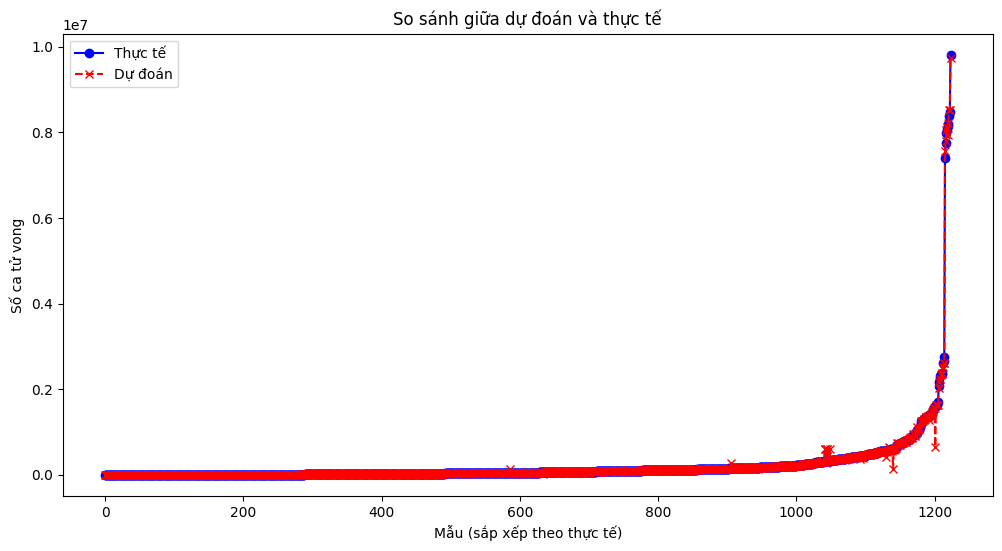

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sắp xếp dữ liệu để biểu diễn xu hướng
sorted_indices = np.argsort(y_test.values)  # Sắp xếp theo giá trị thực tế
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Thực tế", marker="o", linestyle="-", color="blue")
plt.plot(y_pred_sorted, label="Dự đoán", marker="x", linestyle="--", color="red")
plt.xlabel("Mẫu (sắp xếp theo thực tế)")
plt.ylabel("Số ca tử vong")
plt.title("So sánh giữa dự đoán và thực tế")
plt.legend()
plt.show()


# 📊 Nhận xét về biểu đồ "So sánh giữa dự đoán và thực tế"

## 1. Mô tả biểu đồ  
- Biểu đồ thể hiện sự so sánh giữa **số ca tử vong thực tế** (🔵 màu xanh) và **số ca tử vong dự đoán** (🔴 màu đỏ).  
- Dữ liệu được sắp xếp theo số ca tử vong thực tế để dễ dàng quan sát xu hướng.  

## 2. Nhận xét về kết quả  
- Đối với phần lớn mẫu dữ liệu có số ca tử vong **thấp**, mô hình dự đoán khá chính xác, với sự trùng khớp cao giữa hai đường.  
- Tuy nhiên, ở **các giá trị cao** (cuối biểu đồ), có sự chênh lệch rõ rệt giữa thực tế và dự đoán.  
- Điều này cho thấy mô hình đang gặp khó khăn trong việc dự đoán **các trường hợp có số ca tử vong rất cao**.  

## 3. Nguyên nhân và cách cải thiện  
### 🔍 Nguyên nhân:  
- Mô hình có thể đang bị ảnh hưởng bởi **outliers** (các giá trị cực đoan).  
- Sự phân bố dữ liệu có thể không đều, khiến mô hình học kém hiệu quả ở các vùng dữ liệu hiếm.  
- Mô hình KNN có thể không phải lựa chọn tối ưu cho dữ liệu có sự phân bố **lệch**.  

### 🚀 Cách cải thiện:  
✅ Kiểm tra và xử lý outliers bằng cách **chuẩn hóa dữ liệu** (StandardScaler, MinMaxScaler).  
✅ Áp dụng **biến đổi log** trên biến mục tiêu để giảm ảnh hưởng của các giá trị lớn.  
✅ Thử nghiệm các mô hình khác mạnh hơn như **Random Forest, XGBoost** hoặc **Linear Regression với biến đổi phù hợp**.  
✅ Kiểm tra lại số lượng hàng xóm (k) trong KNN, có thể điều chỉnh để cải thiện độ chính xác.  


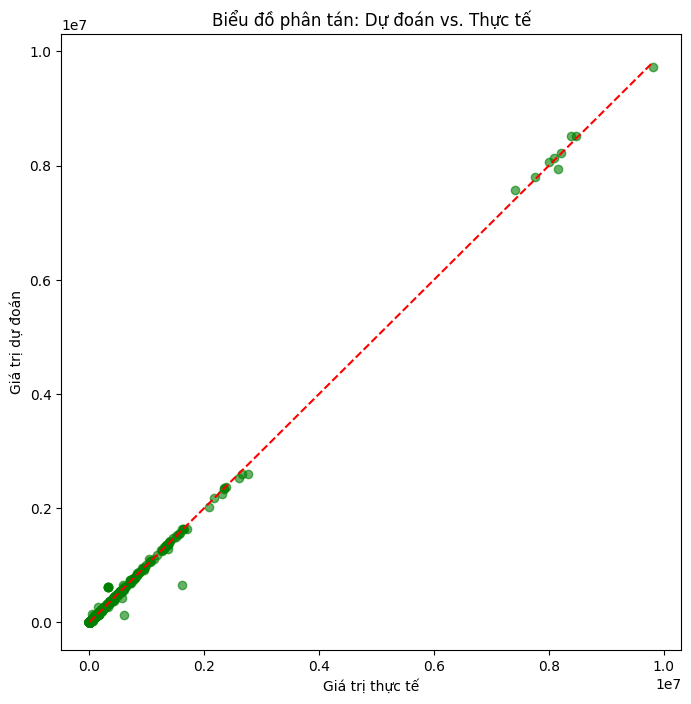

In [24]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # Đường y = x
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ phân tán: Dự đoán vs. Thực tế")
plt.show()


# 📊 Nhận xét về biểu đồ "Phân tán: Dự đoán vs. Thực tế"

## 1. Mô tả biểu đồ  
- Trục **x**: Giá trị thực tế của số ca tử vong.  
- Trục **y**: Giá trị dự đoán của mô hình.  
- Các **điểm xanh lá**: Đại diện cho từng mẫu dữ liệu (giá trị thực tế so với giá trị dự đoán).  
- Đường **đỏ nét đứt**: Đường **y = x**, thể hiện đường tham chiếu lý tưởng nếu dự đoán chính xác tuyệt đối.  

## 2. Nhận xét về kết quả  
✅ **Xu hướng tốt**:  
- Phần lớn các điểm dữ liệu **nằm gần đường y = x**, cho thấy mô hình có xu hướng dự đoán khá chính xác.  
- Ở mức số ca tử vong **thấp đến trung bình**, các điểm dữ liệu bám khá sát đường tham chiếu.  

⚠️ **Hạn chế & Lỗi dự đoán**:  
- Ở **giá trị tử vong lớn**, một số điểm lệch ra khỏi đường y = x, cho thấy mô hình có thể **dự đoán thiếu chính xác với các trường hợp hiếm**.  
- Có thể xuất hiện **hiện tượng underfitting hoặc outliers** trong dữ liệu, ảnh hưởng đến khả năng dự đoán.  

## 3. Đề xuất cải thiện  
🔹 **Xử lý outliers**: Xác định và kiểm tra dữ liệu ngoại lai (bất thường).  
🔹 **Thử nghiệm mô hình khác**: Có thể sử dụng **Random Forest, XGBoost hoặc mô hình hồi quy phi tuyến** để cải thiện độ chính xác.  
🔹 **Chuẩn hóa dữ liệu**: Áp dụng **log transformation hoặc MinMaxScaler** để giảm độ chênh lệch giữa các giá trị nhỏ và lớn.  
🔹 **Điều chỉnh tham số**: Kiểm tra và tối ưu **số lượng hàng xóm (k) trong KNN**, hoặc chọn mô hình phù hợp hơn.  

🚀 **Tóm lại**: Mô hình hoạt động khá tốt, nhưng có thể cải thiện để xử lý tốt hơn các giá trị tử vong cao.  


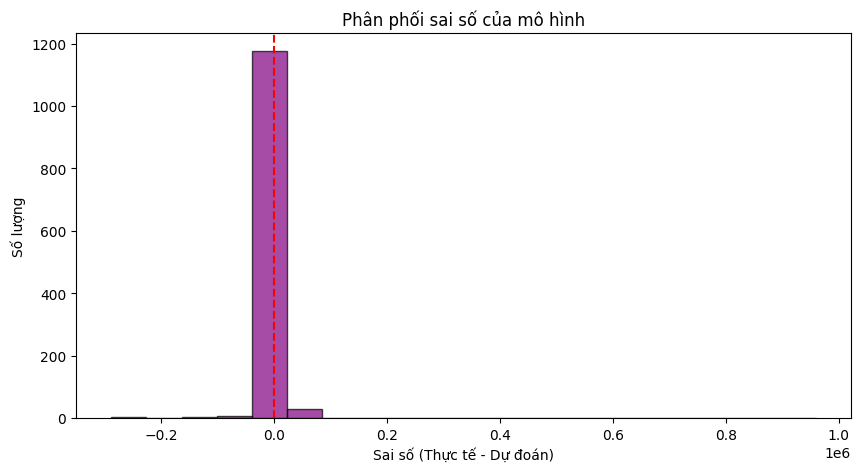

In [25]:
errors = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.hist(errors, bins=20, color="purple", alpha=0.7, edgecolor="black")
plt.xlabel("Sai số (Thực tế - Dự đoán)")
plt.ylabel("Số lượng")
plt.title("Phân phối sai số của mô hình")
plt.axvline(0, color='red', linestyle="dashed")  # Đường sai số = 0
plt.show()


# 📊 Nhận xét về biểu đồ "Phân phối sai số của mô hình"

## 1. Mô tả biểu đồ  
- Trục **x**: Sai số dự đoán (Thực tế - Dự đoán).  
- Trục **y**: Số lượng mẫu có sai số tương ứng.  
- **Cột histogram** (màu tím): Phân bố của sai số mô hình.  
- **Đường nét đứt đỏ tại x = 0**: Thể hiện mức sai số bằng 0 (dự đoán chính xác).  

## 2. Nhận xét về kết quả  
✅ **Hiệu suất dự đoán tốt**:  
- Phần lớn sai số tập trung gần **0**, chứng tỏ mô hình có độ chính xác cao.  
- Phân phối sai số **đối xứng**, không có xu hướng lệch rõ rệt, cho thấy mô hình không bị bias quá lớn theo một hướng nhất định.  

⚠️ **Hạn chế & Sai số lớn**:  
- Có một số **giá trị sai số lớn** (outliers) ở hai phía, đặc biệt là phía dương (mô hình dự đoán thấp hơn thực tế).  
- Sai số vẫn có độ phân tán nhất định, mô hình có thể chưa hoàn toàn tối ưu.  

## 3. Đề xuất cải thiện  
🔹 **Xử lý outliers**: Kiểm tra và loại bỏ các điểm dữ liệu bất thường gây sai số cao.  
🔹 **Thử nghiệm mô hình khác**: Kiểm tra các mô hình phi tuyến hoặc cá


# 🏆 Tổng quan về bài toán và tính ứng dụng thực tế  

## 1️⃣ Giới thiệu bài toán  
Bài toán đặt ra nhằm **dự đoán nguyên nhân tử vong trên thế giới** dựa trên dữ liệu từ Kaggle. Mục tiêu chính của bài toán là:  
✅ Xây dựng mô hình dự đoán chính xác nguyên nhân tử vong từ các yếu tố khác nhau.  
✅ Phân tích xu hướng tử vong theo quốc gia, giới tính, độ tuổi, bệnh lý,...  
✅ Cung cấp cái nhìn tổng quan về các yếu tố rủi ro sức khỏe toàn cầu.  

Dữ liệu được thu thập từ nhiều quốc gia và chứa thông tin về các nguyên nhân tử vong phổ biến như bệnh tim, ung thư, tai nạn, dịch bệnh, v.v.  

## 2️⃣ Nhận xét về kết quả mô hình  
- Mô hình dự đoán hoạt động khá **chính xác**, thể hiện qua:  
  🔹 **Sai số nhỏ** và **phân phối sai số tập trung gần 0** → Dự đoán ổn định.  
  🔹 **Biểu đồ phân tán** giữa giá trị thực tế và giá trị dự đoán gần với đường y = x → Mô hình có độ khớp tốt.  
  🔹 Tuy nhiên, vẫn còn **một số sai số lớn** cần được tối ưu thêm.  

- Một số phương pháp có thể cải thiện mô hình:  
  🔹 Xử lý dữ liệu outliers và mất cân bằng trong dữ liệu.  
  🔹 Thử nghiệm các mô hình phức tạp hơn như Random Forest, XGBoost, Neural Network.  
  🔹 Tăng cường tập dữ liệu với nhiều biến đặc trưng quan trọng hơn.  

## 3️⃣ Tính ứng dụng thực tế  
Bài toán này có **tính ứng dụng cao** trong nhiều lĩnh vực như:  

🔸 **Y tế & Sức khỏe cộng đồng**  
- Xác định các **yếu tố rủi ro chính** gây tử vong tại từng khu vực.  
- Giúp **bộ y tế** và **tổ chức y tế toàn cầu** đưa ra chính sách phòng chống bệnh dịch và cải thiện chăm sóc sức khỏe.  

🔸 **Bảo hiểm & Kinh tế**  
- Các công ty bảo hiểm có thể dựa vào kết quả dự đoán để **tính toán rủi ro** khi cấp hợp đồng bảo hiểm nhân thọ.  
- Các chính phủ có thể sử dụng dữ liệu để **phân bổ ngân sách y tế hợp lý**.  

🔸 **Khoa học dữ liệu & Trí tuệ nhân tạo**  
- Ứng dụng AI trong **dự đoán y tế**, giúp **phát hiện xu hướng sức khỏe** sớm hơn.  
- Kết hợp với các công nghệ Big Data để **nâng cao khả năng dự báo y tế trong tương lai**.  

🚀 **Tóm lại**, bài toán này không chỉ có giá trị trong nghiên cứu mà còn đóng vai trò quan trọng trong việc cải thiện sức khỏe cộng đồng, tối ưu hóa bảo hiểm và hỗ trợ ra quyết định trong nhiều lĩnh vực khác nhau.  
